In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Loading Dataset

In [362]:
def load_data():
    """
    Returns:
    X - training data with dimensions (n_of_features, n_of_examples)
    Y - labels (1 on the class index, -1 elsewhere) with dimensions (n_of_features, n_of_examples)
    """
    x1 = []
    x2 = []
    classes = []
    with open('tren_data2_06.txt') as f:
        for line in f:
            line = line.split()
            
            x1.append(float(line[0]))
            x2.append(float(line[1]))
            classes.append(int(float(line[2])))
    
    X = np.array([[x1, x2] for x1, x2 in zip(x1, x2)])
    
    classes = np.array(classes)
    """
    Y = np.zeros(shape=(classes.shape[0], classes.max()))
    Y[np.arange(classes.shape[0]), classes-1] = 1
    """
    Y = np.ones(shape=(classes.shape[0], classes.max()))
    Y[np.arange(classes.shape[0]), classes-1] = -1
    Y = -Y

    return X.T, Y.T, classes

In [363]:
X, Y, classes = load_data()

print(X[:,0])
print(Y[:,0])
# print(classes)

[ 7.6919123 -6.8810342]
[ 1. -1. -1. -1. -1.]


In [364]:
def plotPoints(X, classes):
    plt.figure(figsize=(10, 7))
    X = np.array(X)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=classes)
    plt.title("Zobrazeni dat", fontsize=18)
    ax = plt.gca()
    ax.set_facecolor('white')
    plt.show()

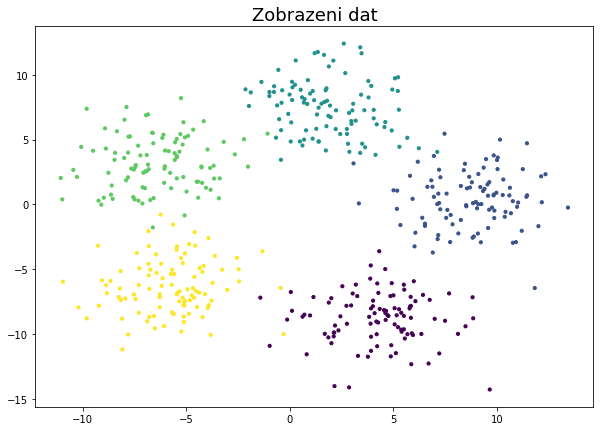

In [365]:
plotPoints(X.T, classes)

## Building block

### Initialization

In [213]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y,1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [214]:
# parametry site
parameters = initialize_parameters(2, 5, 5)
#print("W1 = " + str(parameters["W1"]))
#print("b1 = " + str(parameters["b1"]))
#print("W2 = " + str(parameters["W2"]))
#print("b2 = " + str(parameters["b2"]))

print("W1.shape = " + str(parameters["W1"].shape))
print("b1.shape = " + str(parameters["b1"].shape))
print("W2.shape = " + str(parameters["W2"].shape))
print("b2.shape = " + str(parameters["b2"].shape))

W1.shape = (5, 2)
b1.shape = (5, 1)
W2.shape = (5, 5)
b2.shape = (5, 1)


### Forward Propagation

In [215]:
def tanh(x, slope):
    # POZN. - numpy ma vlastni tanh
    t = 2 / (1+np.exp(-slope*x)) - 1
    return t

In [216]:
def forward_propagation(X, parameters, slope):
    """
    Argument:
    X - input data of size (n_x, m)
    parameters - python dictionary containing parameters
    slopes - list of slope values
    
    Returns:
    A2 - The output of neural network
    cache - dictionary containing "Z1", "A1", "Z2", "A2"
    """
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1, X) + b1
    A1 = tanh(Z1, slope[0])
    Z2 = np.dot(W2, A1) + b2
    A2 = tanh(Z2, slope[1])
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [217]:
slope = [1, 1]
A2, cache = forward_propagation(X, parameters, slope)

In [218]:
print(A2.shape)
print(A2[:,0])

(5, 500)
[ 1.18693806e-03 -9.34908887e-04  1.73206609e-04  3.77020903e-04
 -3.26162546e-05]


### Compute Cost

In [219]:
def compute_cost(A, Y):
    """
    Argument:
    A - output of neural network
    Y - correct label
    
    Returns:
    E - error across all training examples
    """
    
    cost_vec = np.zeros((Y.shape[1],1))
    
    for i in range(Y.shape[1]):
        cost_vec[i,0] = np.dot((Y-A)[:,i], (Y-A)[:,i].T)
    
    #print(cost_vec.shape)
    summed_cost = np.sum(cost_vec, axis=0)
    #print(summed_cost)
    
    E = 1/2 * summed_cost[0]
    
    return E

In [220]:
E = compute_cost(A2, Y)
print(E)

1250.3088631393493


### Backward propagation

In [221]:
def backward_propagation(X, Y, parameters, cache, slope):
    m = X.shape[1]
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    Z1 = cache["Z1"]
    Z2 = cache["Z2"]
    
    dZ2 = (Y - A2) * (slope[1]/2) * (1 - np.power(A2,2))
    dW2 = (1/m) * np.dot(dZ2,A1.T)
    db2 = (1/m) * (np.sum(dZ2,axis=1,keepdims=True))
    
    dZ1 = np.dot(W2.T,dZ2) * (slope[0]/2) * (1 - np.power(A1,2)) # no ale nenasobim to tim np.sum((Y - A2),axis=0)
    dW1 = (1/m) * np.dot(dZ1,X.T)
    db1 = (1/m) *(np.sum(dZ1, axis=1, keepdims=True))
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2,}
    
    return grads

In [222]:
print(parameters["W2"])
grads = backward_propagation(X, Y, parameters, cache, slope)
print(grads["dW2"])

[[-0.00240462 -0.0035005  -0.00254459  0.01803307  0.01710193]
 [ 0.00644693 -0.00279399 -0.01962095 -0.00298635 -0.01811832]
 [-0.0041911   0.01363115 -0.01305623  0.00120597  0.00131555]
 [-0.00803009 -0.0014221   0.00700256  0.01793397 -0.01383014]
 [-0.01179727 -0.00084866 -0.0098963   0.00320792 -0.0125986 ]]
[[ 0.02716917  0.01214859  0.00924076 -0.01646975 -0.00924301]
 [ 0.03230024  0.00857128  0.00564299 -0.02661059 -0.02068579]
 [ 0.02418765  0.00230856  0.0004836  -0.02486226 -0.02230203]
 [ 0.01397462  0.00203389  0.0009192  -0.01347124 -0.0116632 ]
 [ 0.01577191  0.00807671  0.0062998  -0.00833087 -0.00365519]]


### Update parameters

In [223]:
def update_parameters(parameters, grads, learning_rate):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 + learning_rate * dW1
    b1 = b1 + learning_rate * db1
    W2 = W2 + learning_rate * dW2
    b2 = b2 + learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [227]:
learning_rate = 0.1
slope = [1, 1]
print(parameters["W2"])

A2, cache = forward_propagation(X, parameters, slope)
print("Output: " + str(A2[:,0]))

parameters = update_parameters(parameters, grads, learning_rate)
print(parameters["W2"])

[[ 0.26928708  0.11798535  0.089863   -0.14666443 -0.07532812]
 [ 0.32944934  0.08291884  0.03680894 -0.26909223 -0.22497625]
 [ 0.23768537  0.03671679 -0.00822027 -0.24741664 -0.22170472]
 [ 0.13171612  0.01891679  0.01619453 -0.11677846 -0.13046211]
 [ 0.14592188  0.07991848  0.05310167 -0.08010075 -0.04915049]]
Output: [-0.88507174 -0.8878782  -0.89612226 -0.90073912 -0.89557589]
[[ 0.272004    0.1192002   0.09078707 -0.1483114  -0.07625242]
 [ 0.33267937  0.08377597  0.03737324 -0.27175329 -0.22704483]
 [ 0.24010414  0.03694765 -0.00817191 -0.24990287 -0.22393492]
 [ 0.13311358  0.01912017  0.01628645 -0.11812559 -0.13162843]
 [ 0.14749907  0.08072615  0.05373165 -0.08093384 -0.04951601]]


In [228]:
A2, cache = forward_propagation(X, parameters, slope)

In [229]:
print(A2[:,0])

[-0.88795991 -0.89066935 -0.89883189 -0.9034225  -0.89833855]


## Model

In [383]:
def nn_model(X, Y, slope, learning_rate, num_iterations, print_cost):
    
    n_x = X.shape[0]
    n_h = 20 # 10 pro prvni dataset, 
    n_y = Y.shape[0]
    
    print("The size of the input layer is: n_x = " + str(n_x))
    print("The size of the hidden layer is: n_h = " + str(n_h))
    print("The size of the output layer is: n_y = " + str(n_y) + "\n")
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    print("First initial weight matrix \n" + str(W1) + "\n")
    print("First initial bias vector \n" + str(b1) + "\n")
    print("Second initial weight matrix \n" + str(W2) + "\n")
    print("Second initial bias vector \n" + str(b2) + "\n")
    
    trained = False
    
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters, slope)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(X, Y, parameters, cache, slope)
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            
        if cost < 1:
            print("Neural network has been trained after %i iterations \n" %i)
            print("Final error is %f \n" %cost)
            trained = True
            break;
            
    if (not trained):
        print("\nNeural network didnt reach desired error value")
        print("Final achieved error is %f \n" %cost)
            
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
            
    print("First final weight matrix \n" + str(W1) + "\n")
    print("First final bias vector \n" + str(b1) + "\n")
    print("Second final weight matrix \n" + str(W2) + "\n")
    print("Second final bias vector \n" + str(b2) + "\n")
    
    return parameters

In [384]:
slope = [1, 1]
parameters = nn_model(X, Y, slope, learning_rate=1, num_iterations=1000, print_cost=True)

The size of the input layer is: n_x = 2
The size of the hidden layer is: n_h = 20
The size of the output layer is: n_y = 5

First initial weight matrix 
[[ 1.80306438e-03  4.37933516e-03]
 [ 2.10275901e-02 -5.14434733e-03]
 [ 8.33343413e-03  3.62950943e-03]
 [ 9.26040425e-03 -7.36649610e-03]
 [ 1.52265752e-02  7.18515234e-04]
 [ 2.51827787e-02 -7.34056094e-05]
 [ 1.50688281e-02  2.68657747e-02]
 [ 1.23559534e-02  1.27722029e-02]
 [-1.94846114e-03 -1.35949223e-02]
 [ 2.19036019e-03  1.77445008e-02]
 [-1.68737143e-04 -2.18288030e-02]
 [-2.18210384e-03  1.22031541e-02]
 [ 2.55964791e-03 -4.57381424e-03]
 [ 6.77797818e-03  6.36220934e-03]
 [-1.54811811e-02 -1.38820915e-02]
 [-1.82787876e-02  1.62000175e-03]
 [ 1.50975517e-02  2.05935787e-02]
 [ 1.28436382e-02  7.39993611e-03]
 [ 1.48400119e-02 -1.37756625e-02]
 [-1.82881912e-02  1.15476562e-02]]

First initial bias vector 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

In [385]:
A2, cache = forward_propagation(X, parameters, slope)
A2 = np.rint(A2) # round to nearest integer

print(A2[:,0])
print(Y[:,0])

[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]


## Klasifikace rastru

In [386]:
def createraster(X, pointsinrow):
    boundary = [np.amax(X[1, :]) + 0.2, np.amax(X[0, :]) + 0.2, np.amin(X[1, :]) - 0.2, np.amin(X[0, :]) - 0.2]  # clockwise
    
    print(np.amax(X[1, :]))
    print(np.amax(X[0, :]))
    print(np.amin(X[1, :]))
    print(np.amin(X[0, :]))
    
    top, right, bottom, left = boundary
    columnpoints = top - bottom
    raster = np.linspace([left, top], [right, top], pointsinrow)
    top -= columnpoints / pointsinrow

    while top >= bottom:
        raster_row = np.linspace([left, top], [right, top], pointsinrow)
        raster = np.concatenate((raster, raster_row), axis=0)
        top -= columnpoints / pointsinrow

    plt.show()

    return raster

In [387]:
pointsinrow = 200  # points in 1 row
raster = createraster(X, pointsinrow)

12.409329
13.435873
-14.29898
-11.071743


In [388]:
raster_classified, cache = forward_propagation(raster.T, parameters, slope)
raster_classified = np.rint(raster_classified)
print(raster_classified[:, 247:250])

[[-1. -1. -1.]
 [-1. -1. -1.]
 [-1. -1. -1.]
 [ 1.  1.  1.]
 [-1. -1. -1.]]


In [389]:
raster_classes = []
points_with_class = []
points_without_class = []
j = 0

for i in range(raster_classified.shape[1]):
    
    column = raster_classified[:,i]
    column_sum = np.sum(column)
    
    if column_sum == -3:
        x = np.squeeze(np.where(column == 1))
        
        if x.size > 0:
            raster_classes.append(x)
            points_with_class.append(raster[i])
        
        """ DEBUG
        j +=1
        if j==247:
            print(raster_classified[:,i])
            print(np.squeeze(np.where(column == 1)))
            print(raster_classes[-1])
        """
        

In [390]:
print(raster_classes[247:250])

[array(2), array(2), array(2)]


## Vykresleni oklasifikovaneho rastru

In [395]:
def plotPoints2(X, classes, Y, classes2):
    X = np.array(X)
    Y = np.array(Y)
    classes = np.array(classes)
    classes2 = np.array(classes2)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(Y[:, 0], Y[:, 1], s=10, c=classes2)
    plt.scatter(X[:, 0], X[:, 1], s=10, c='salmon') # classes nebo pr 'salmon'
    plt.title("Zobrazeni dat", fontsize=18)
    ax = plt.gca()
    ax.set_facecolor('white')
    plt.show()

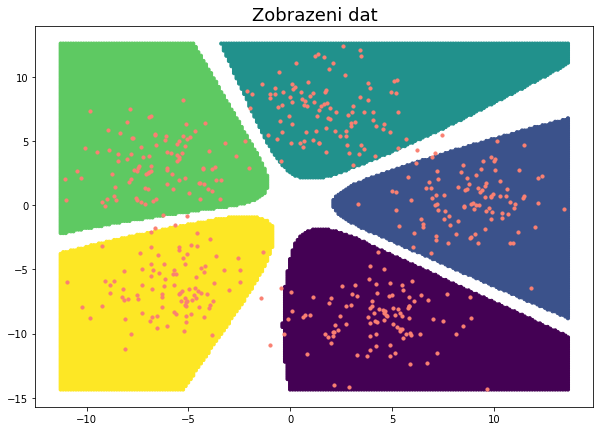

In [396]:
#plotPoints(points_with_class, raster_classes)
#plotPoints(X.T, classes)
plotPoints2(X.T, classes, points_with_class, raster_classes)